## 交调站车流量预测分析

In [51]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [52]:
pd.set_option('display.max.columns',None)
pd.set_option('display.float_format',lambda x : '%.2f' % x)
totalPath = "/home/bruce/bigVolumn/Datasets/traffic_data/removeStr.csv"
df = pd.read_csv(totalPath, header=0, names=['Devices', 'Lane', 'PercentageCar', 'AverageDistance', 'TimeOccupy', 'Traffic', 'Speed','Time'])
# print(df.info())
print(df.describe())
print(df.head(5))
devicesName = df['Devices'].unique()
print(devicesName)
# for i in devicesName:
#     df[df["Devices"]==i].to_csv(str(i)+"_device.csv", index=False)

df[df["Traffic"]==max(df['Traffic'])]


                 Devices       Lane  PercentageCar  AverageDistance  \
count         2222158.00 2222158.00     2222158.00       2222158.00   
mean  154398803544877.09      21.70          48.15           502.24   
std    23429268500645.61      10.02          36.34           526.94   
min    51121311060001.00      11.00           0.00             0.00   
25%   141150311111133.00      12.00           9.00           188.00   
50%   171170318052611.00      22.00          50.00           369.00   
75%   171170318052614.00      32.00          86.00           662.00   
max   171170318052615.00      33.00         110.00         10473.00   

       TimeOccupy    Traffic      Speed  
count  2222158.00 2222158.00 1983306.00  
mean         2.77      20.46      75.12  
std          4.75      25.22      18.80  
min          0.00       0.00       1.00  
25%          0.00       5.00      65.81  
50%          1.00      15.00      76.00  
75%          3.00      29.00      87.26  
max        106.00    533

,Devices,Lane,PercentageCar,AverageDistance,TimeOccupy,Traffic,Speed,Time
1626039,141150311111128,33,100,634,100,5339.50,62.46,2019-03-06 07:17:41


In [315]:
dv1Path = "/home/bruce/PycharmProjects/ashrae/141150311111128_device.csv"
dv1 = pd.read_csv(dv1Path)
dv1.info()
dv1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442548 entries, 0 to 442547
Data columns (total 8 columns):
Devices            442548 non-null int64
Lane               442548 non-null int64
PercentageCar      442548 non-null int64
AverageDistance    442548 non-null int64
TimeOccupy         442548 non-null int64
Traffic            442548 non-null float64
Speed              417400 non-null float64
Time               442548 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 27.0+ MB


,Devices,Lane,PercentageCar,AverageDistance,TimeOccupy,Traffic,Speed
count,442548.00,442548.00,442548.00,442548.00,442548.00,442548.00,417400.00
mean,141150311112136.53,22.00,76.93,482.67,3.92,17.67,72.57
std,1008.53,10.03,28.77,398.49,4.07,25.45,17.58
min,141150311111128.00,11.00,0.00,0.00,0.00,0.00,10.00
25%,141150311111128.00,12.00,75.00,253.00,1.00,6.00,60.50
50%,141150311111128.00,22.00,89.00,402.00,3.00,15.00,72.67
75%,141150311111128.00,32.00,93.00,618.00,5.00,24.50,85.85
max,141150311111128.00,33.00,100.00,5297.00,100.00,5339.50,130.00


In [316]:
dv1.head(30)

,Devices,Lane,PercentageCar,AverageDistance,TimeOccupy,Traffic,Speed,Time
0,141150311111128,11,80,1357,2,5.00,114.00,2019-09-30 12:37:16
1,141150311111128,12,94,342,6,21.00,77.86,2019-09-30 12:37:16
2,141150311111128,13,92,495,4,22.00,71.93,2019-09-30 12:37:16
3,141150311111128,31,94,399,5,16.00,79.00,2019-09-30 12:37:16
4,141150311111128,32,96,204,9,29.50,70.15,2019-09-30 12:37:16
5,141150311111128,33,89,679,3,14.00,77.21,2019-09-30 12:37:16
6,141150311111128,11,50,3807,1,2.00,114.00,2019-09-30 12:32:16
7,141150311111128,12,96,277,8,32.00,73.66,2019-09-30 12:32:16
8,141150311111128,13,92,501,4,24.50,70.04,2019-09-30 12:32:16
9,141150311111128,31,96,274,8,24.50,81.92,2019-09-30 12:32:16


In [317]:
print(dv1['Lane'].unique())  ## 11, 31
dv1['Time'] = pd.to_datetime(dv1['Time'])
dv1[dv1["Traffic"]==max(dv1['Traffic'])]

[11 12 13 31 32 33]


,Devices,Lane,PercentageCar,AverageDistance,TimeOccupy,Traffic,Speed,Time
333005,141150311111128,33,100,634,100,5339.50,62.46,2019-03-06 07:17:41


### 选取一个交调站的单个上行通道

In [318]:
dv1Upstream = dv1[dv1['Lane']==31]
dv1Upstream.head(5)

,Devices,Lane,PercentageCar,AverageDistance,TimeOccupy,Traffic,Speed,Time
3,141150311111128,31,94,399,5,16.00,79.00,2019-09-30 12:37:16
9,141150311111128,31,96,274,8,24.50,81.92,2019-09-30 12:32:16
15,141150311111128,31,93,379,5,15.00,81.00,2019-09-30 12:27:16
21,141150311111128,31,96,213,9,26.00,78.00,2019-09-30 12:22:17
27,141150311111128,31,95,332,7,20.00,82.00,2019-09-30 12:17:17


In [319]:
# 按照时间进行排序
dv1.sort_values('Time', inplace=True)
dv1Upstream.sort_values('Time', inplace=True)
dv1Upstream.reset_index(drop=True, inplace=True)
dv1Upstream
dv1Upstream.describe()

,Devices,Lane,PercentageCar,AverageDistance,TimeOccupy,Traffic,Speed
count,73758.00,73758.00,73758.00,73758.00,73758.00,73758.00,60147.00
mean,141150311110880.09,31.00,59.83,425.81,2.96,9.03,80.66
std,247.91,0.00,40.33,459.35,3.47,12.43,12.08
min,141150311111128.00,31.00,0.00,0.00,0.00,0.00,18.00
25%,141150311111128.00,31.00,0.00,0.00,0.00,1.00,72.67
50%,141150311111128.00,31.00,83.00,351.00,2.00,6.00,79.00
75%,141150311111128.00,31.00,93.00,589.75,5.00,14.00,91.00
max,141150311111128.00,31.00,100.00,5297.00,100.00,1361.00,118.00


In [320]:
dv1Upstream.head(10)

,Devices,Lane,PercentageCar,AverageDistance,TimeOccupy,Traffic,Speed,Time
0,141150311111128,31,50,98,1,2.00,83.00,2019-01-01 00:04:28
1,141150311111128,31,0,0,0,0.00,nan,2019-01-01 00:09:52
2,141150311111128,31,0,0,0,0.00,nan,2019-01-01 00:14:52
3,141150311111128,31,0,0,0,1.00,81.00,2019-01-01 00:19:52
4,141150311111128,31,0,0,0,0.00,nan,2019-01-01 00:24:52
5,141150311111128,31,0,0,0,0.00,nan,2019-01-01 00:29:52
6,141150311111128,31,0,0,0,0.00,nan,2019-01-01 00:35:15
7,141150311111128,31,0,0,0,1.00,81.00,2019-01-01 00:39:52
8,141150311111128,31,0,0,0,0.00,nan,2019-01-01 00:44:52
9,141150311111128,31,0,0,0,0.00,nan,2019-01-01 00:49:52


### 对时间继续进行处理，把日期和时间分开

In [321]:
temp = pd.DatetimeIndex(dv1Upstream['Time'])
dv1Upstream['date'] = temp.date
dv1Upstream['time'] = temp.time
dv1Upstream.head()

,Devices,Lane,PercentageCar,AverageDistance,TimeOccupy,Traffic,Speed,Time,date,time
0,141150311111128,31,50,98,1,2.00,83.00,2019-01-01 00:04:28,2019-01-01,00:04:28
1,141150311111128,31,0,0,0,0.00,nan,2019-01-01 00:09:52,2019-01-01,00:09:52
2,141150311111128,31,0,0,0,0.00,nan,2019-01-01 00:14:52,2019-01-01,00:14:52
3,141150311111128,31,0,0,0,1.00,81.00,2019-01-01 00:19:52,2019-01-01,00:19:52
4,141150311111128,31,0,0,0,0.00,nan,2019-01-01 00:24:52,2019-01-01,00:24:52


### 设定这一天是这一周的第几天

In [322]:
dv1Upstream['dayofweek'] = pd.DatetimeIndex(dv1Upstream.date).dayofweek
dv1Upstream.drop(["Time"], axis=1, inplace=True)
dv1Upstream.head(10)

,Devices,Lane,PercentageCar,AverageDistance,TimeOccupy,Traffic,Speed,date,time,dayofweek
0,141150311111128,31,50,98,1,2.00,83.00,2019-01-01,00:04:28,1
1,141150311111128,31,0,0,0,0.00,nan,2019-01-01,00:09:52,1
2,141150311111128,31,0,0,0,0.00,nan,2019-01-01,00:14:52,1
3,141150311111128,31,0,0,0,1.00,81.00,2019-01-01,00:19:52,1
4,141150311111128,31,0,0,0,0.00,nan,2019-01-01,00:24:52,1
5,141150311111128,31,0,0,0,0.00,nan,2019-01-01,00:29:52,1
6,141150311111128,31,0,0,0,0.00,nan,2019-01-01,00:35:15,1
7,141150311111128,31,0,0,0,1.00,81.00,2019-01-01,00:39:52,1
8,141150311111128,31,0,0,0,0.00,nan,2019-01-01,00:44:52,1
9,141150311111128,31,0,0,0,0.00,nan,2019-01-01,00:49:52,1


### 把时间继续拆分成hour，精确到小时即可

In [323]:
dv1Upstream['hour']=pd.to_datetime(dv1Upstream.time, format="%H:%M:%S")
dv1Upstream["hour"] = pd.Index(dv1Upstream['hour']).hour
dv1Upstream.head(3)

,Devices,Lane,PercentageCar,AverageDistance,TimeOccupy,Traffic,Speed,date,time,dayofweek,hour
0,141150311111128,31,50,98,1,2.00,83.00,2019-01-01,00:04:28,1,0
1,141150311111128,31,0,0,0,0.00,nan,2019-01-01,00:09:52,1,0
2,141150311111128,31,0,0,0,0.00,nan,2019-01-01,00:14:52,1,0


In [324]:
# 流量最多天数是哪一天
dv1Upstream[dv1Upstream["Traffic"]==max(dv1Upstream['Traffic'])]

,Devices,Lane,PercentageCar,AverageDistance,TimeOccupy,Traffic,Speed,date,time,dayofweek,hour
24530,141150311111128,31,97,1212,100,1361.00,90.60,2019-03-30,09:24:31,5,9


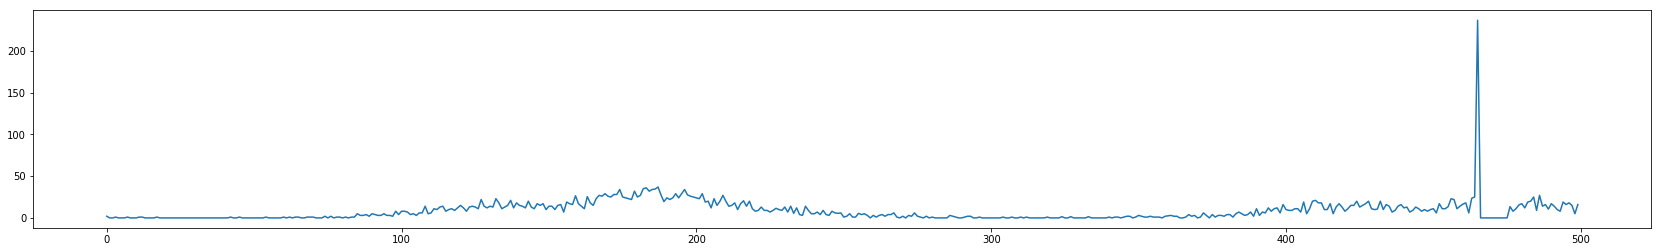

In [427]:
# 流量趋势图
fig, axis1 = plt.subplots(1, 1, figsize=(29, 4))
dv1Upstream[dv1Upstream["Traffic"]==220.50]
dv1Upstream['Traffic'][0:500].plot()
# print("the count is:\n",count)

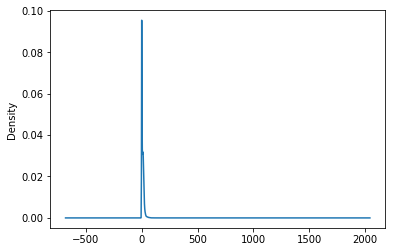

In [326]:
## 车流量分布图
# fig, axis1 = plt.subplots(1, 1, figsize=(29, 4))
dv1Upstream['Traffic'].plot(kind='kde')

In [327]:
## 一周星期几对于流量分布的影响 ,0是周一
dayWeek = dv1Upstream.groupby('dayofweek')
dayWeek['Traffic'].sum().reset_index()

,dayofweek,Traffic
0,0,81601.00
1,1,83337.50
2,2,96104.00
3,3,88351.50
4,4,113796.00
5,5,108986.00
6,6,93603.00


In [328]:
## 去掉这些日期中的特殊节假, 日期是从7月29日--9月
dv1Upstream.info()
dv1Upstream.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73758 entries, 0 to 73757
Data columns (total 11 columns):
Devices            73758 non-null int64
Lane               73758 non-null int64
PercentageCar      73758 non-null int64
AverageDistance    73758 non-null int64
TimeOccupy         73758 non-null int64
Traffic            73758 non-null float64
Speed              60147 non-null float64
date               73758 non-null object
time               73758 non-null object
dayofweek          73758 non-null int64
hour               73758 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 6.2+ MB


,Devices,Lane,PercentageCar,AverageDistance,TimeOccupy,Traffic,Speed,date,time,dayofweek,hour
0,141150311111128,31,50,98,1,2.00,83.00,2019-01-01,00:04:28,1,0
1,141150311111128,31,0,0,0,0.00,nan,2019-01-01,00:09:52,1,0
2,141150311111128,31,0,0,0,0.00,nan,2019-01-01,00:14:52,1,0


In [329]:
data_train = dv1Upstream.drop(['Devices','Lane', 'date','time'], axis=1)

In [330]:
data_train.head(10)

,PercentageCar,AverageDistance,TimeOccupy,Traffic,Speed,dayofweek,hour
0,50,98,1,2.00,83.00,1,0
1,0,0,0,0.00,nan,1,0
2,0,0,0,0.00,nan,1,0
3,0,0,0,1.00,81.00,1,0
4,0,0,0,0.00,nan,1,0
5,0,0,0,0.00,nan,1,0
6,0,0,0,0.00,nan,1,0
7,0,0,0,1.00,81.00,1,0
8,0,0,0,0.00,nan,1,0
9,0,0,0,0.00,nan,1,0


In [331]:
# speed 使用上一个值进行填充
data_train['Speed'].fillna(method='pad' ,inplace=True)  
data_train["Speed"].fillna(method='bfill',inplace=True)
data_train.describe()


,PercentageCar,AverageDistance,TimeOccupy,Traffic,Speed,dayofweek,hour
count,73758.00,73758.00,73758.00,73758.00,73758.00,73758.00,73758.00
mean,59.83,425.81,2.96,9.03,80.43,3.00,11.48
std,40.33,459.35,3.47,12.43,12.31,2.00,6.86
min,0.00,0.00,0.00,0.00,18.00,0.00,0.00
25%,0.00,0.00,0.00,1.00,72.20,1.00,6.00
50%,83.00,351.00,2.00,6.00,79.00,3.00,11.00
75%,93.00,589.75,5.00,14.00,91.00,5.00,17.00
max,100.00,5297.00,100.00,1361.00,118.00,6.00,23.00


In [332]:
# data_train = data_train[["Traffic","Speed","dayofweek","hour"]]
print(data_train.head(10))
y = data_train.values[:,0]
x = data_train.values[:,1:]

   PercentageCar  AverageDistance  TimeOccupy  Traffic  Speed  dayofweek  hour
0             50               98           1     2.00  83.00          1     0
1              0                0           0     0.00  83.00          1     0
2              0                0           0     0.00  83.00          1     0
3              0                0           0     1.00  81.00          1     0
4              0                0           0     0.00  81.00          1     0
5              0                0           0     0.00  81.00          1     0
6              0                0           0     0.00  81.00          1     0
7              0                0           0     1.00  81.00          1     0
8              0                0           0     0.00  81.00          1     0
9              0                0           0     0.00  81.00          1     0


In [333]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=0, n_estimators=700, n_jobs=-1)
rfr.fit(x_train, y_train)
rfr.score(x_test, y_test)
y_predict = rfr.predict(x_test)
print("the mse is:", mean_squared_error(y_test, y_predict))
print("the mae is: ", mean_absolute_error(y_test, y_predict))
print("the r2 is ", r2_score(y_test, y_predict))

the mse is: 1.5949461539908805
the mae is:  0.08735923458320427
the r2 is  0.9990243175567568


### 随机森林回归预测结果 和 真实结果的曲线图 

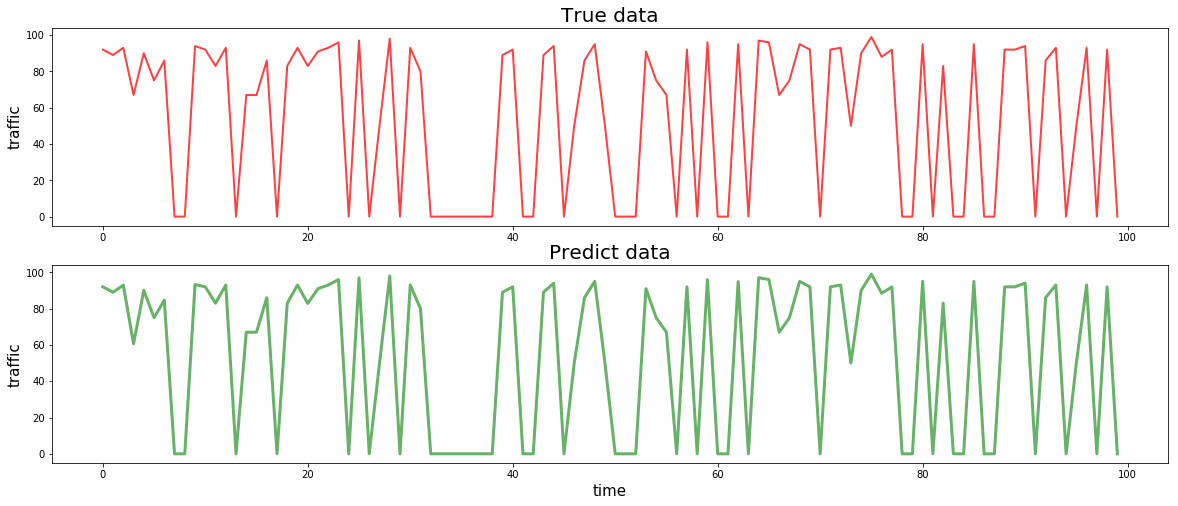

In [424]:
# fig, axis1 = plt.subplots(2, 1)
fig = plt.figure(figsize=(20,8),facecolor='white')

fig = plt.figure(num=1, figsize=(20, 8),dpi=80) 
plt.subplot(2,1,1)
plt.plot(y_test[0:100], 'r-', linewidth=2, alpha=0.75, label='y_true', zorder=3)
plt.ylabel("traffic", fontsize=15)
# plt.legend(loc="upper left")
plt.title("True data",fontsize=20)

# fig, axis1 = plt.subplots(2, 1, figsize=(29, 4))
plt.subplot(2,1,2)
plt.plot(y_predict[0:100], 'g-', linewidth=3,alpha=0.6, label='y_pred')
plt.xlabel("time", fontsize=15)
plt.ylabel("traffic", fontsize=15)
plt.title('Predict data', fontsize=20)

# fig, ax = plt.subplots(1,1, figsize=(20,4))
# line1, = ax.plot(y_test[0:100], color='r', label='Using set_dashes')
# line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break
# line2, = ax.plot(y_predict[0:100], dashes =[ 6, 2],alpha=0.75, label='Using the dashes parameter')
# ax.legend(loc='upper left')

plt.savefig("randomForest_141150311111128_31_device.png")


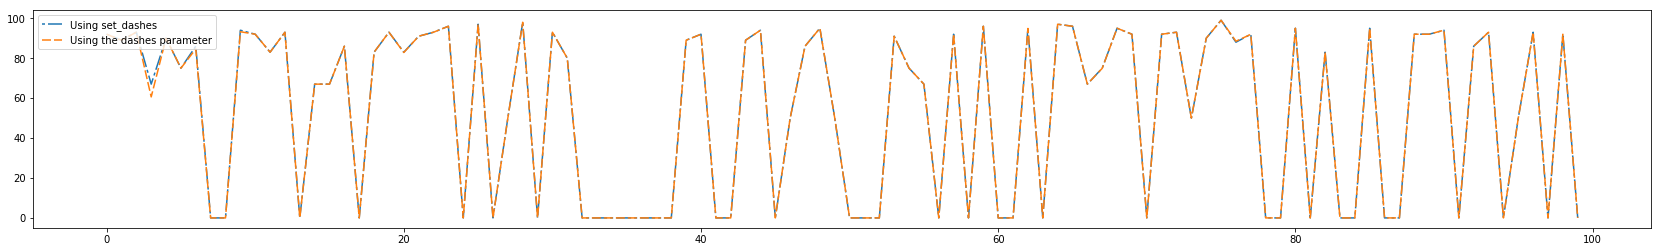

In [384]:
fig, ax = plt.subplots(figsize=(29,4))

line1, = ax.plot(y_test[0:100], label='Using set_dashes')
line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break
line2, = ax.plot(y_predict[0:100], dashes =[ 6, 2], label='Using the dashes parameter')
ax.legend(loc='upper left')

### 使用gridSearch 搜索最佳参数

In [336]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit, StratifiedKFold
param_grid = [{'n_estimators': [10, 30, 50], 'max_features': [1,2,3]},{'bootstrap': [False], 'n_estimators': [300, 400,500,600,700,800], 'max_features': [1,2,3]}]
grid_search = GridSearchCV(rfr, param_grid=param_grid, scoring='neg_mean_squared_error',cv=5, n_jobs=-1).fit(x_train, y_train)

In [131]:
y_predict_ = grid_search.best_estimator_.predict(x_test)

In [132]:
print(mean_squared_error(y_test, y_predict_))
print(mean_absolute_error(y_test, y_predict_))
print(r2_score(y_test, y_predict_))

1548.1427719422807
12.03161727705398
-0.14224775766792574


### 使用时间序列预测模型

In [169]:
import numpy as np
import matplotlib
matplotlib.use('agg')
import tensorflow as tf
from tensorflow.contrib.timeseries.python.timeseries import NumpyReader

### 只要可以调节的参数是滑窗大小input_window_size

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpounhi3_q', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f809016f6d8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpounhi3_q/model.ckpt.
INFO:tensorflow:loss = 1.7340802, step = 1
INFO:tensorf

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpounhi3_q/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
the mean squared is : 8820.474159946209
the mean absolute error is: 76.21415658950805
the r2 score is:  -18.019399765082774


SystemExit: 

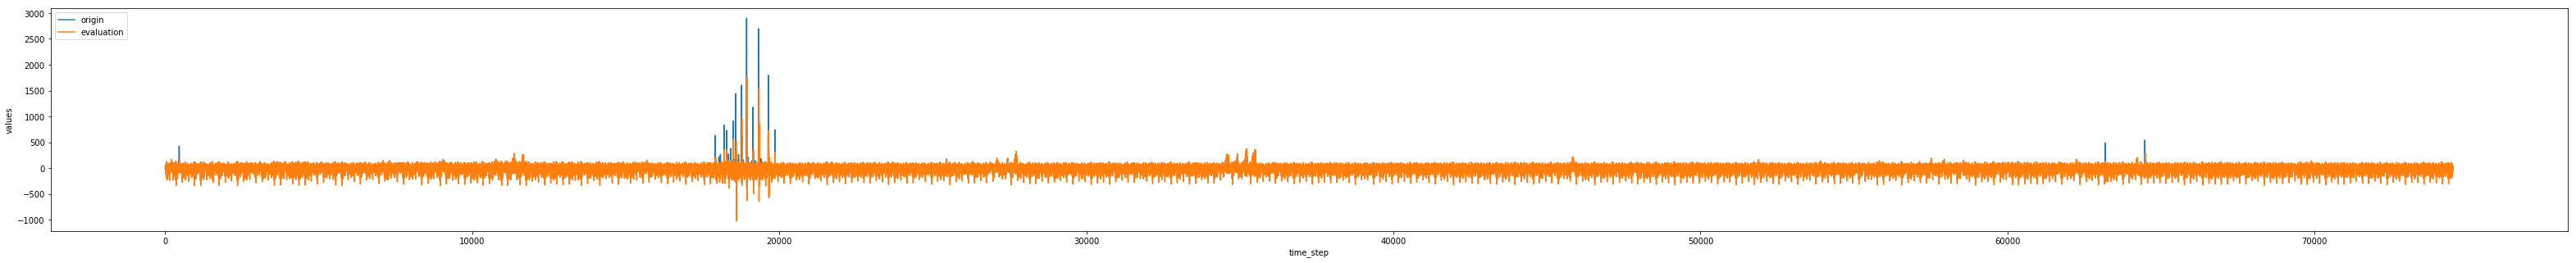

In [171]:
x = np.array(range(74513))
y = data_train["Traffic"]
y = np.array(y)

def main(_):

    data = {
        tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
        tf.contrib.timeseries.TrainEvalFeatures.VALUES: y,
    }

    reader = NumpyReader(data)

    train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(
        reader, batch_size=16, window_size=30)

    ar = tf.contrib.timeseries.ARRegressor(
        periodicities=200, input_window_size=20, output_window_size=10,
        num_features=1,
        loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)

    ar.train(input_fn=train_input_fn, steps=5000)

    evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
    evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=1)

    (predictions,) = tuple(ar.predict(
        input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
            evaluation, steps=250)))  # 预测250秒之后的数据

    plt.figure(figsize=(55, 5))
    plt.plot(data['times'].reshape(-1), data['values'].reshape(-1), label='origin')
    plt.plot(evaluation['times'].reshape(-1), evaluation['mean'].reshape(-1), label='evaluation')
    plt.xlabel('time_step')
    plt.ylabel('values')
    plt.legend(loc="upper left")
    plt.savefig('timeSeries_51121312100001_31_device.png')
    print("the mean squared is :", mean_squared_error(data["values"][50:100], evaluation["mean"][0][0:50]))
    print("the mean absolute error is:", mean_absolute_error(data["values"][50:100], evaluation["mean"][0][0:50]))
    print("the r2 score is: ", r2_score(data["values"][30:2030], evaluation["mean"][0][0:2000]))

if __name__ == '__main__':
    tf.logging.set_verbosity(tf.logging.INFO)
    tf.app.run()

In [428]:
import os
os.getcwd()

'/home/bruce/PycharmProjects/ashrae'